<a href="https://colab.research.google.com/github/benhakunama/machinelearning/blob/main/senate_election_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as IDG
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [70]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn import metrics

In [ ]:
df = pd.read_csv("house_polls_cleaned_all_v2.csv")

In [ ]:
df.head()

,Unnamed: 0,poll_id,pollster_id,question_id,tracking,population_full,subpopulation,sample_size,sponsor_candidate_party,sponsor_candidate_id,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,1,79519,1334,158926,NaN,lv,NaN,1219.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,79519,1334,158927,NaN,lv,NaN,1219.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,79519,1334,158928,NaN,lv,NaN,1219.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,79519,1334,159067,NaN,lv,NaN,1253.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,79519,1334,159068,NaN,lv,NaN,1253.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'poll_id', 'pollster_id', 'question_id', 'tracking',
       'population_full', 'subpopulation', 'sample_size',
       'sponsor_candidate_party', 'sponsor_candidate_id', 'start_date',
       'end_date', 'state', 'seat_name', 'methodology', 'fte_grade',
       'pollster_rating_name', 'pollster_rating_id', 'display_name',
       'sponsors', 'sponsor_ids', 'pollster', 'office_type', 'cycle',
       'partisan', 'race_id', 'internal', 'source', 'seat_name.1',
       'seat_number', 'stage', 'nationwide_batch', 'ranked_choice_reallocated',
       'NumberofCandidates', 'PredictedWinnerPct', 'PredictedWinner',
       'ActualWinner', 'WinnerName', 'WinnerGEVotes', 'WinnerGEPerc',
       'duration', 'accuracy', 'methodology_Online', 'methodology_Text',
       'methodology_Live Phone', 'methodology_IVR', 'fte_grade_B',
       'fte_grade_C', 'fte_grade_B-', 'fte_grade_A-', 'fte_grade_B+',
       'fte_grade_D', 'fte_grade_C-', 'fte_grade_A', 'fte_grade_A+',
       'fte_grade_F', 

In [ ]:
df.isnull().sum()

Unnamed: 0                      0
poll_id                         0
pollster_id                     0
question_id                     0
tracking                     1320
population_full                 0
subpopulation                1320
sample_size                     1
sponsor_candidate_party       978
sponsor_candidate_id          978
start_date                      0
end_date                        0
state                           0
seat_name                       0
methodology                   301
fte_grade                      60
pollster_rating_name            0
pollster_rating_id              0
display_name                    0
sponsors                      660
sponsor_ids                   660
pollster                        0
office_type                     0
cycle                           0
partisan                      735
race_id                         0
internal                        0
source                        175
seat_name.1                  1128
seat_number   

In [ ]:
len(df)

1320

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1320 non-null   int64  
 1   poll_id                    1320 non-null   int64  
 2   pollster_id                1320 non-null   int64  
 3   question_id                1320 non-null   int64  
 4   tracking                   0 non-null      float64
 5   population_full            1320 non-null   object 
 6   subpopulation              0 non-null      float64
 7   sample_size                1319 non-null   float64
 8   sponsor_candidate_party    342 non-null    object 
 9   sponsor_candidate_id       342 non-null    float64
 10  start_date                 1320 non-null   object 
 11  end_date                   1320 non-null   object 
 12  state                      1320 non-null   object 
 13  seat_name                  1320 non-null   objec

In [ ]:
df = df.drop(['tracking', 'subpopulation'], axis=1)

In [ ]:
df.head()

,Unnamed: 0,poll_id,pollster_id,question_id,population_full,sample_size,sponsor_candidate_party,sponsor_candidate_id,start_date,end_date,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,1,79519,1334,158926,lv,1219.0,NaN,NaN,2022-07-20,2022-07-25,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,79519,1334,158927,lv,1219.0,NaN,NaN,2022-07-20,2022-07-25,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,79519,1334,158928,lv,1219.0,NaN,NaN,2022-07-20,2022-07-25,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,79519,1334,159067,lv,1253.0,NaN,NaN,2022-07-20,2022-07-25,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,79519,1334,159068,lv,1253.0,NaN,NaN,2022-07-20,2022-07-25,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(['sponsor_candidate_party', 'sponsor_candidate_id'], axis=1)

In [ ]:
df.head()

,Unnamed: 0,poll_id,pollster_id,question_id,population_full,sample_size,start_date,end_date,state,seat_name,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,1,79519,1334,158926,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,79519,1334,158927,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,79519,1334,158928,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,79519,1334,159067,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,79519,1334,159068,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1320 non-null   int64  
 1   poll_id                    1320 non-null   int64  
 2   pollster_id                1320 non-null   int64  
 3   question_id                1320 non-null   int64  
 4   population_full            1320 non-null   object 
 5   sample_size                1319 non-null   float64
 6   start_date                 1320 non-null   object 
 7   end_date                   1320 non-null   object 
 8   state                      1320 non-null   object 
 9   seat_name                  1320 non-null   object 
 10  methodology                1019 non-null   object 
 11  fte_grade                  1260 non-null   object 
 12  pollster_rating_name       1320 non-null   object 
 13  pollster_rating_id         1320 non-null   int64

In [ ]:
df.isnull().sum()

Unnamed: 0                      0
poll_id                         0
pollster_id                     0
question_id                     0
population_full                 0
sample_size                     1
start_date                      0
end_date                        0
state                           0
seat_name                       0
methodology                   301
fte_grade                      60
pollster_rating_name            0
pollster_rating_id              0
display_name                    0
sponsors                      660
sponsor_ids                   660
pollster                        0
office_type                     0
cycle                           0
partisan                      735
race_id                         0
internal                        0
source                        175
seat_name.1                  1128
seat_number                     0
stage                           0
nationwide_batch                0
ranked_choice_reallocated       0
NumberofCandid

<AxesSubplot:>

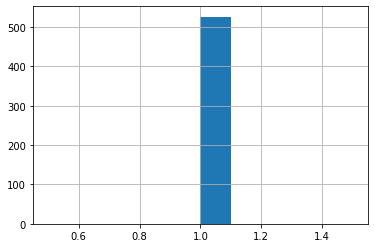

In [ ]:
df.fte_grade_B.hist()

<AxesSubplot:>

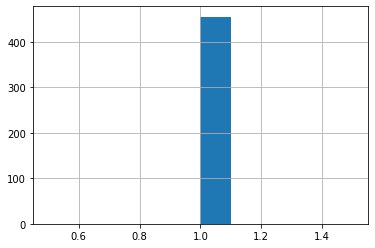

In [ ]:
df.fte_grade_C.hist()

<AxesSubplot:>

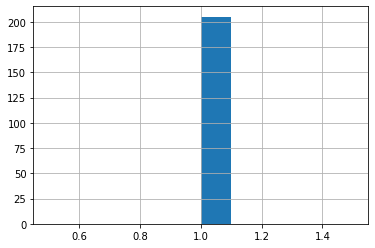

In [ ]:
df.fte_grade_A.hist()

In [ ]:
df['fte_grade_B'].fillna(0)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1315    1.0
1316    0.0
1317    1.0
1318    0.0
1319    0.0
Name: fte_grade_B, Length: 1320, dtype: float64

In [ ]:
cols = ["fte_grade_B", "fte_grade_A-", "fte_grade_C", "fte_grade_B-", "fte_grade_B+", "fte_grade_D", "fte_grade_C-", "fte_grade_A", "fte_grade_A+", "fte_grade_F", "fte_grade_C+"]
for col in cols:
  df[col] = df[col].fillna(0)

In [ ]:
df.head()

,Unnamed: 0,poll_id,pollster_id,question_id,population_full,sample_size,start_date,end_date,state,seat_name,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,1,79519,1334,158926,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,79519,1334,158927,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,79519,1334,158928,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,79519,1334,159067,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,79519,1334,159068,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['fte_grade_D'] = df['fte_grade_D'].fillna(0)

In [ ]:
df.head()

,Unnamed: 0,poll_id,pollster_id,question_id,population_full,sample_size,start_date,end_date,state,seat_name,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,1,79519,1334,158926,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2,79519,1334,158927,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,3,79519,1334,158928,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,4,79519,1334,159067,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,5,79519,1334,159068,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,...,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'poll_id', 'pollster_id', 'question_id',
       'population_full', 'sample_size', 'start_date', 'end_date', 'state',
       'seat_name', 'methodology', 'fte_grade', 'pollster_rating_name',
       'pollster_rating_id', 'display_name', 'sponsors', 'sponsor_ids',
       'pollster', 'office_type', 'cycle', 'partisan', 'race_id', 'internal',
       'source', 'seat_name.1', 'seat_number', 'stage', 'nationwide_batch',
       'ranked_choice_reallocated', 'NumberofCandidates', 'PredictedWinnerPct',
       'PredictedWinner', 'ActualWinner', 'WinnerName', 'WinnerGEVotes',
       'WinnerGEPerc', 'duration', 'accuracy', 'methodology_Online',
       'methodology_Text', 'methodology_Live Phone', 'methodology_IVR',
       'fte_grade_B', 'fte_grade_C', 'fte_grade_B-', 'fte_grade_A-',
       'fte_grade_B+', 'fte_grade_D', 'fte_grade_C-', 'fte_grade_A',
       'fte_grade_A+', 'fte_grade_F', 'fte_grade_C+'],
      dtype='object')

<AxesSubplot:>

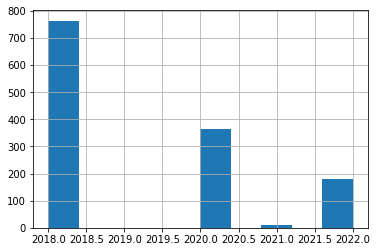

In [ ]:
df.cycle.hist()

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,poll_id,pollster_id,question_id,population_full,sample_size,start_date,end_date,state,seat_name,methodology,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,79519,1334,158926,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,Online/Text,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79519,1334,158927,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,Online/Text,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79519,1334,158928,lv,1219.0,2022-07-20,2022-07-25,Alaska,District 1,Online/Text,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79519,1334,159067,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,Online/Text,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79519,1334,159068,lv,1253.0,2022-07-20,2022-07-25,Alaska,District 1,Online/Text,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['population_full'] = df['population_full'].str.upper()

In [ ]:
df.head()

,poll_id,pollster_id,question_id,population_full,sample_size,start_date,end_date,state,seat_name,methodology,...,fte_grade_C,fte_grade_B-,fte_grade_A-,fte_grade_B+,fte_grade_D,fte_grade_C-,fte_grade_A,fte_grade_A+,fte_grade_F,fte_grade_C+
0,79519,1334,158926,LV,1219.0,2022-07-20,2022-07-25,ALASKA,DISTRICT 1,ONLINE/TEXT,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79519,1334,158927,LV,1219.0,2022-07-20,2022-07-25,ALASKA,DISTRICT 1,ONLINE/TEXT,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79519,1334,158928,LV,1219.0,2022-07-20,2022-07-25,ALASKA,DISTRICT 1,ONLINE/TEXT,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79519,1334,159067,LV,1253.0,2022-07-20,2022-07-25,ALASKA,DISTRICT 1,ONLINE/TEXT,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79519,1334,159068,LV,1253.0,2022-07-20,2022-07-25,ALASKA,DISTRICT 1,ONLINE/TEXT,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['state'] = df['state'].str.upper()

In [ ]:
df['seat_name'] = df['seat_name'].str.upper()

In [ ]:
df['methodology'] = df['methodology'].str.upper()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    1320 non-null   int64  
 1   pollster_id                1320 non-null   int64  
 2   question_id                1320 non-null   int64  
 3   population_full            1320 non-null   object 
 4   sample_size                1319 non-null   float64
 5   start_date                 1320 non-null   object 
 6   end_date                   1320 non-null   object 
 7   state                      1320 non-null   object 
 8   seat_name                  1320 non-null   object 
 9   methodology                1019 non-null   object 
 10  fte_grade                  1260 non-null   object 
 11  pollster_rating_name       1320 non-null   object 
 12  pollster_rating_id         1320 non-null   int64  
 13  display_name               1320 non-null   objec

In [ ]:
df = df.drop(['sponsors', 'sponsor_ids'], axis=1)

In [ ]:

df = df.drop(['partisan'], axis=1)

In [ ]:
df = df.drop(['seat_name.1', 'source'], axis=1)

In [ ]:
df = df.drop(['methodology', 'fte_grade'], axis=1)

In [ ]:
df = df.drop(['start_date', 'end_date', 'seat_name', 'pollster_rating_name', 'display_name','pollster', 'office_type', 'stage' ], axis=1)

In [ ]:
df = df.drop(['WinnerName', 'WinnerGEPerc'], axis=1)

In [ ]:
df = df.drop(['WinnerGEVotes'], axis=1)

In [ ]:
df['ActualWinner'].head()

0    D
1    D
2    D
3    D
4    D
Name: ActualWinner, dtype: object

In [ ]:
df['win'] = df.apply(lambda row: 1 if row.PredictedWinner[0:1] ==  row.ActualWinner else 0, axis = 1)

<AxesSubplot:>

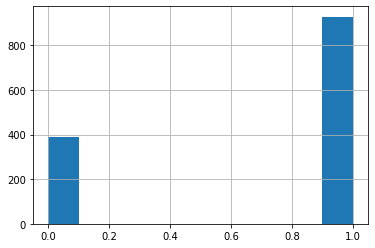

In [ ]:
df['win'].hist()

In [ ]:
df = df.drop(['ActualWinner'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    1320 non-null   int64  
 1   pollster_id                1320 non-null   int64  
 2   question_id                1320 non-null   int64  
 3   population_full            1320 non-null   object 
 4   sample_size                1319 non-null   float64
 5   state                      1320 non-null   object 
 6   pollster_rating_id         1320 non-null   int64  
 7   cycle                      1320 non-null   int64  
 8   race_id                    1320 non-null   int64  
 9   internal                   1320 non-null   int64  
 10  seat_number                1320 non-null   int64  
 11  nationwide_batch           1320 non-null   int64  
 12  ranked_choice_reallocated  1320 non-null   int64  
 13  NumberofCandidates         1320 non-null   int64

<AxesSubplot:>

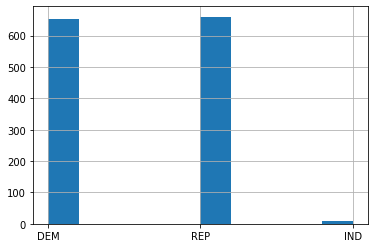

In [ ]:
df['PredictedWinner'].hist()

<AxesSubplot:>

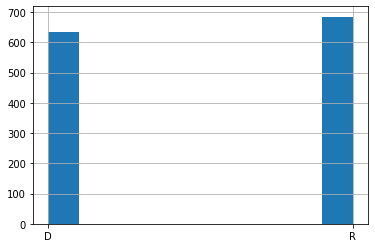

In [ ]:
df['ActualWinner'].hist()

In [ ]:
cols = ["methodology_Online", "methodology_Text", "methodology_Live Phone", "methodology_IVR"]
for col in cols:
  df[col] = df[col].fillna(0)

In [ ]:
df['accuracy'].value_counts()

True     929
False    391
Name: accuracy, dtype: int64

In [ ]:
df['accuracy'] = df['accuracy'].apply( lambda x: 1 if x else 0 )


In [ ]:
df['accuracy'].value_counts()

1    929
0    391
Name: accuracy, dtype: int64

In [ ]:
df['nationwide_batch'] = df['nationwide_batch'].apply( lambda x: 1 if x else 0 )
df['ranked_choice_reallocated'] = df['ranked_choice_reallocated'].apply( lambda x: 1 if x else 0 )

In [ ]:
df['population_full'].value_counts()

LV    1026
RV     210
V       80
A        4
Name: population_full, dtype: int64

In [ ]:

df['internal'] = df['internal'].apply( lambda x: 1 if x else 0 )

In [ ]:
df.to_csv("clean_house_v3", sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    1320 non-null   int64  
 1   pollster_id                1320 non-null   int64  
 2   question_id                1320 non-null   int64  
 3   population_full            1320 non-null   object 
 4   sample_size                1319 non-null   float64
 5   state                      1320 non-null   object 
 6   pollster_rating_id         1320 non-null   int64  
 7   cycle                      1320 non-null   int64  
 8   race_id                    1320 non-null   int64  
 9   internal                   1320 non-null   int64  
 10  seat_number                1320 non-null   int64  
 11  nationwide_batch           1320 non-null   int64  
 12  ranked_choice_reallocated  1320 non-null   int64  
 13  NumberofCandidates         1320 non-null   int64

In [ ]:
cat_columns = ["population_full", "state", "PredictedWinner"]

In [ ]:
def category_features(df, category_feature_names):
    df  =  pd.get_dummies ( df ,  columns = category_feature_names) 
    return df

In [ ]:
df = category_features(df, cat_columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    1320 non-null   int64  
 1   pollster_id                1320 non-null   int64  
 2   question_id                1320 non-null   int64  
 3   sample_size                1319 non-null   float64
 4   pollster_rating_id         1320 non-null   int64  
 5   cycle                      1320 non-null   int64  
 6   race_id                    1320 non-null   int64  
 7   internal                   1320 non-null   int64  
 8   seat_number                1320 non-null   int64  
 9   nationwide_batch           1320 non-null   int64  
 10  ranked_choice_reallocated  1320 non-null   int64  
 11  NumberofCandidates         1320 non-null   int64  
 12  PredictedWinnerPct         1320 non-null   float64
 13  duration                   1320 non-null   int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

poll_id                0
pollster_id            0
question_id            0
sample_size            0
pollster_rating_id     0
                      ..
state_WEST VIRGINIA    0
state_WISCONSIN        0
PredictedWinner_DEM    0
PredictedWinner_IND    0
PredictedWinner_REP    0
Length: 80, dtype: int64

In [73]:
df_train = pd.read_csv("df.train_encoded.csv")
df_test = pd.read_csv("df.test_encoded.csv")

In [75]:
df_train.columns

Index(['population_fulla', 'population_fulllv', 'population_fullrv',
       'population_fullv', 'sample_size', 'sponsor_candidate_partyDEM',
       'sponsor_candidate_partyREP', 'stateAlaska', 'stateArizona',
       'stateArkansas',
       ...
       'fte_grade_B..1', 'fte_grade_D', 'fte_grade_C.', 'fte_grade_A',
       'fte_grade_A..1', 'fte_grade_F', 'fte_grade_C..1', 'start_elect_ndays',
       'end_elect_ndays', 'prewinner'],
      dtype='object', length=120)

In [126]:
X = df_train.drop(['prewinner'], axis=1)
y = df_train['prewinner']


In [127]:
Xt2 = df_test.drop(['prewinner'], axis=1)
y2 = df_test['prewinner']

In [78]:
len(X)

1140

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_columns = ["PredictedWinnerPct", "NumberofCandidates", "start_elect_ndays", "end_elect_ndays", "duration", "sample_size"]
transformer = ColumnTransformer(transformers=[('cat', StandardScaler(), num_columns)], remainder='passthrough')
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
X2 = transformer.transform(Xt2)


In [130]:
X_train.shape

(912, 119)

In [96]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
# predict test in training data test
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
#print("Time consumed for training: %4.3f seconds" % (knn_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))
# predict test in test data test
prediction_start = time.perf_counter()
preds = knn.predict(X2)
prediction_end = time.perf_counter()
acc_knn = (preds == y2).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
#print("Time consumed for training: %4.3f seconds" % (knn_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 69.74
Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 47.22


In [97]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
# predict test in training data test
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
#print("Time consumed for training: %4.3f" % (xgb_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
# predict test in test data test
prediction_start = time.perf_counter()
preds = xgb.predict(X2)
prediction_end = time.perf_counter()
acc_xgb = (preds == y2).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
#print("Time consumed for training: %4.3f" % (xgb_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))


XGBoost's prediction accuracy is: 78.07
XGBoost's prediction accuracy is: 59.44


In [98]:
#lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
lr_test_pred = lr.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(lr_test_pred,y_test))

lr_test_pred = lr.predict(X2)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(lr_test_pred,y2))


The accuracy of the Logistic Regression is 0.7456140350877193
The accuracy of the Logistic Regression is 0.5666666666666667


In [99]:
rfc = RandomForestClassifier(min_samples_split = 0.01)
rfc.fit(X_train, y_train)

rfc_test_pred = rfc.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(rfc_test_pred,y_test))

rfc_test_pred = rfc.predict(X2)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(rfc_test_pred,y2))

The accuracy of the Logistic Regression is 0.7763157894736842
The accuracy of the Logistic Regression is 0.5611111111111111


In [100]:
from tensorflow import keras

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [102]:
X_train.shape

(912, 119)

In [ ]:
y_train.shape

(883,)

In [103]:
model = Sequential()

# Add input layer with 119 neurons
model.add(Dense(119, input_dim=119, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(521, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(256, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(64, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(8, activation='relu'))

# Add a hidden layer with 16 neurons
#model.add(Dense(4, activation='relu'))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2, y2)
print('Real Future Test accuracy:', test_acc)



Epoch 1/50
23/23 [==============================] - 3s 33ms/step - loss: 0.6670 - accuracy: 0.6077 - val_loss: 0.6350 - val_accuracy: 0.6776
Epoch 2/50
23/23 [==============================] - 0s 18ms/step - loss: 0.5422 - accuracy: 0.7366 - val_loss: 0.6274 - val_accuracy: 0.6448
Epoch 3/50
23/23 [==============================] - 0s 18ms/step - loss: 0.4587 - accuracy: 0.7764 - val_loss: 0.5907 - val_accuracy: 0.6721
Epoch 4/50
23/23 [==============================] - 0s 21ms/step - loss: 0.3837 - accuracy: 0.8313 - val_loss: 0.6780 - val_accuracy: 0.6721
Epoch 5/50
23/23 [==============================] - 0s 20ms/step - loss: 0.3405 - accuracy: 0.8587 - val_loss: 0.7440 - val_accuracy: 0.7213
Epoch 6/50
23/23 [==============================] - 0s 15ms/step - loss: 0.2706 - accuracy: 0.8930 - val_loss: 0.8302 - val_accuracy: 0.6885
Epoch 7/50
23/23 [==============================] - 0s 15ms/step - loss: 0.1808 - accuracy: 0.9314 - val_loss: 1.0074 - val_accuracy: 0.6667
Epoch 8/50
23

In [125]:
model = Sequential()

# Add input layer with 119 neurons
model.add(Dense(119, input_dim=119, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(521, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(256, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(64, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(8, activation='relu'))

# Add a hidden layer with 16 neurons
#model.add(Dense(4, activation='relu'))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2, y2)
print('Real Future Test accuracy:', test_acc)


Epoch 1/50
23/23 [==============================] - 5s 26ms/step - loss: 0.6863 - accuracy: 0.5171 - val_loss: 0.6648 - val_accuracy: 0.7322
Epoch 2/50
23/23 [==============================] - 0s 12ms/step - loss: 0.6517 - accuracy: 0.6324 - val_loss: 0.6277 - val_accuracy: 0.7322
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6013 - accuracy: 0.7147 - val_loss: 0.5340 - val_accuracy: 0.8087
Epoch 4/50
23/23 [==============================] - 0s 16ms/step - loss: 0.5725 - accuracy: 0.7517 - val_loss: 0.5301 - val_accuracy: 0.7923
Epoch 5/50
23/23 [==============================] - 0s 15ms/step - loss: 0.5395 - accuracy: 0.7764 - val_loss: 0.5053 - val_accuracy: 0.8251
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.5139 - accuracy: 0.7997 - val_loss: 0.5349 - val_accuracy: 0.7705
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.4826 - accuracy: 0.8217 - val_loss: 0.5395 - val_accuracy: 0.7923
Epoch 8/50
23

In [104]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [105]:
import numpy as np

In [ ]:
Xtrain = X_train
Xtest = X_test

In [ ]:
X_train = Xtrain
X_test = Xtest

In [ ]:
num_samples, num_features = X_train.shape

In [ ]:
X_train.shape

(883, 79)

In [ ]:
import numpy as np

In [106]:

# Reshape X_train to have 4 dimensions (batch_size, height, width, channels)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X2_cnn = X2.reshape(X2.shape[0], X2.shape[1], 1, 1)

# Parse numbers as floats
X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X2_cnn = X2_cnn.astype('float32')

model = Sequential()

# Add convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], 1, 1)))

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:], padding = 'same'))


# Add a second convolutional layer with 64 filters and a kernel size of 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2_cnn, y2)
print('Real Future Test accuracy:', test_acc)



Epoch 1/50
29/29 [==============================] - 2s 45ms/step - loss: 0.6457 - accuracy: 0.6250 - val_loss: 0.5503 - val_accuracy: 0.7368
Epoch 2/50
29/29 [==============================] - 1s 37ms/step - loss: 0.5573 - accuracy: 0.7215 - val_loss: 0.5145 - val_accuracy: 0.7632
Epoch 3/50
29/29 [==============================] - 1s 38ms/step - loss: 0.5038 - accuracy: 0.7511 - val_loss: 0.4982 - val_accuracy: 0.7500
Epoch 4/50
29/29 [==============================] - 1s 47ms/step - loss: 0.4848 - accuracy: 0.7599 - val_loss: 0.4919 - val_accuracy: 0.7544
Epoch 5/50
29/29 [==============================] - 2s 61ms/step - loss: 0.4674 - accuracy: 0.7796 - val_loss: 0.4872 - val_accuracy: 0.7368
Epoch 6/50
29/29 [==============================] - 2s 58ms/step - loss: 0.4419 - accuracy: 0.7763 - val_loss: 0.5013 - val_accuracy: 0.7456
Epoch 7/50
29/29 [==============================] - 1s 34ms/step - loss: 0.4294 - accuracy: 0.7950 - val_loss: 0.4834 - val_accuracy: 0.7368
Epoch 8/50
29

In [132]:

# Reshape X_train to have 4 dimensions (batch_size, height, width, channels)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X2_cnn = X2.reshape(X2.shape[0], X2.shape[1], 1, 1)

# # Parse numbers as floats
# X_train_cnn = X_train_cnn.astype('float32')
# X_test_cnn = X_test_cnn.astype('float32')
# X2_cnn = X2_cnn.astype('float32')

model = Sequential()

# Add convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], 1, 1)))

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:], padding = 'same'))


# Add a second convolutional layer with 64 filters and a kernel size of 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2_cnn, y2)
print('Real Future Test accuracy:', test_acc)


Epoch 1/50
23/23 [==============================] - 2s 45ms/step - loss: 0.6534 - accuracy: 0.6379 - val_loss: 0.5730 - val_accuracy: 0.7377
Epoch 2/50
23/23 [==============================] - 1s 35ms/step - loss: 0.5232 - accuracy: 0.7407 - val_loss: 0.5589 - val_accuracy: 0.7377
Epoch 3/50
23/23 [==============================] - 1s 58ms/step - loss: 0.4980 - accuracy: 0.7613 - val_loss: 0.5390 - val_accuracy: 0.7268
Epoch 4/50
23/23 [==============================] - 1s 63ms/step - loss: 0.4707 - accuracy: 0.7709 - val_loss: 0.5325 - val_accuracy: 0.7322
Epoch 5/50
23/23 [==============================] - 2s 75ms/step - loss: 0.4557 - accuracy: 0.7791 - val_loss: 0.5401 - val_accuracy: 0.7213
Epoch 6/50
23/23 [==============================] - 2s 75ms/step - loss: 0.4457 - accuracy: 0.7764 - val_loss: 0.5692 - val_accuracy: 0.7158
Epoch 7/50
23/23 [==============================] - 2s 96ms/step - loss: 0.4352 - accuracy: 0.7805 - val_loss: 0.5496 - val_accuracy: 0.7268
Epoch 8/50
23

In [133]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X2_cnn = X2.reshape(X2.shape[0], X2.shape[1], 1, 1)

# Parse numbers as floats
X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X2_cnn = X2_cnn.astype('float32')

X_train_cnn /= 255
X_test_cnn /= 255
X2_cnn /= 255

batch_size = 32
#num_classes = 10
epochs = 50

#input image dimensions
#img_rows, img_cols = 28, 28


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:], kernel_initializer='he_normal', padding = 'same', data_format='channels_last'))
model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  kernel_initializer='he_normal',
#                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())

# Add an output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2_cnn, y2)
print('Real Future Test accuracy:', test_acc)


Epoch 1/50
23/23 [==============================] - 6s 65ms/step - loss: 0.6999 - accuracy: 0.6516 - val_loss: 0.6834 - val_accuracy: 0.5738
Epoch 2/50
23/23 [==============================] - 1s 53ms/step - loss: 0.4729 - accuracy: 0.7833 - val_loss: 0.6844 - val_accuracy: 0.5738
Epoch 3/50
23/23 [==============================] - 1s 49ms/step - loss: 0.3794 - accuracy: 0.8409 - val_loss: 0.6878 - val_accuracy: 0.5738
Epoch 4/50
23/23 [==============================] - 1s 50ms/step - loss: 0.3393 - accuracy: 0.8505 - val_loss: 0.6891 - val_accuracy: 0.5738
Epoch 5/50
23/23 [==============================] - 1s 54ms/step - loss: 0.3001 - accuracy: 0.8834 - val_loss: 0.6869 - val_accuracy: 0.5738
Epoch 6/50
23/23 [==============================] - 1s 52ms/step - loss: 0.2646 - accuracy: 0.9040 - val_loss: 0.6828 - val_accuracy: 0.5738
Epoch 7/50
23/23 [==============================] - 1s 53ms/step - loss: 0.2443 - accuracy: 0.8985 - val_loss: 0.7039 - val_accuracy: 0.4262
Epoch 8/50
23